una vez que tenemos los datos de las fuentes, en este caso ya tenemos el notebook procederemos a examinarlo

## Estudio
Para ver que hay en el dataframe vamos a estudiar las variables que tenemos y la informacion que podemos sacar. 
El df tiene visos de pertencer a una empresa que recoge las quejas de los cleintes de varias compañias y las gestiona envandolas a las empresas. posterioemente, no siempre, recoge el resultado de las quejas y si estas han derivado posteriormente en problemas mas halla(reclamaciones ante la autoridad, denuncias etc.)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import regex as re
import skrub
import fuentes
from sklearn.preprocessing import LabelEncoder


In [25]:
#!pip install skrub

In [26]:
pd.set_option('display.max_rows', 500)

In [27]:
import fuentes
main_df=fuentes.main_df()
zip_code=pd.read_csv("../data/zip_code.csv")


In [28]:
skrub.TableReport(main_df)

Processing column  14 / 14


<TableReport: use .open() to display>

en este dataframe vemos que hay varias filas en las cuales la respuesta de la compañia esta en tiempo pero no se ha dado todavia, en estas situaciones no tenemos informacion adicional sobre si definitivamente se ha escalado la situacion o no. ello hace que estas filas  no sean realmente informativas.

In [29]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28156 entries, 0 to 28155
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            28156 non-null  int64  
 1   Complaint ID          28156 non-null  int64  
 2   Product               28156 non-null  object 
 3   Sub-product           17582 non-null  object 
 4   Issue                 28154 non-null  object 
 5   Sub-issue             13211 non-null  object 
 6   State                 27735 non-null  object 
 7   ZIP code              27876 non-null  float64
 8   Date received         28156 non-null  object 
 9   Date sent to company  28156 non-null  object 
 10  Company               28156 non-null  object 
 11  Company response      28156 non-null  object 
 12  Timely response?      28156 non-null  object 
 13  Consumer disputed?    6006 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 3.0+ MB


In [30]:
for x in main_df.columns[2:]:
    print(x,((main_df[x].isnull().sum()/28156)*100))



Product 0.0
Sub-product 37.55505043330019
Issue 0.007103281716152862
Sub-issue 53.079272623952264
State 1.4952408012501777
ZIP code 0.9944594402614008
Date received 0.0
Date sent to company 0.0
Company 0.0
Company response 0.0
Timely response? 0.0
Consumer disputed? 78.66884500639296


In [31]:
temp=main_df[main_df["Consumer disputed?"].notnull()]
temp["Consumer disputed?"].value_counts()

Consumer disputed?
Yes    4708
No     1298
Name: count, dtype: int64

In [32]:
pd.set_option('display.max_rows', 1000)
display(temp["Company"].value_counts())
len(temp["Company"])

Company
Equifax                                                  524
JPMorgan Chase                                           318
Wells Fargo                                              317
TransUnion                                               300
Bank of America                                          296
Experian                                                 269
Citibank                                                 245
Nationstar Mortgage                                      216
Ocwen                                                    198
Enhanced Recovery Company, LLC                           126
GE Capital Retail                                        116
U.S. Bancorp                                             108
Discover                                                  87
Amex                                                      83
Encore Capital Group                                      79
Capital One                                               78
Green Tree Servi

6006

In [33]:
df_fechas=pd.to_datetime(main_df["Date sent to company"])-pd.to_datetime(main_df["Date received"])

#main_df["Date received"] = pd.to_datetime(main_df["Date received"])

In [34]:
# el estudio de las fechas a demostrado que solamente existe 1 año en el dataframe
# por tanto, no sera relevante a la hora de trabajar el dataframe. 
años=pd.to_datetime(main_df["Date received"],yearfirst=True)

años.dt.year

columna_años=años.dt.year

columna_años.unique()

columna_mes=años.dt.month
print(columna_mes)

0        3
1        3
2        3
3        3
4        3
        ..
28151    1
28152    1
28153    1
28154    1
28155    1
Name: Date received, Length: 28156, dtype: int32


In [35]:
main_df.describe()

Unnamed: 0  Complaint ID      ZIP code
count  28156.000000  2.815600e+04  27876.000000
mean   14077.500000  1.225267e+06  49921.466423
std     8128.081426  2.835272e+04  30633.853920
min        0.000000  1.177839e+06      9.000000
25%     7038.750000  1.200523e+06  23228.000000
50%    14077.500000  1.224512e+06  44111.000000
75%    21116.250000  1.248698e+06  78744.000000
max    28155.000000  1.292165e+06  99999.000000

In [36]:
main_df["Timely response?"].value_counts()
# aqui de detecta un problema de balance de los datos.

Timely response?
Yes    27444
No       712
Name: count, dtype: int64

In [37]:
main_df["Consumer disputed?"].value_counts()
# aqui tambien tenemos un problema de balanceo en la variable objetivo pero no es tan mala como en 
# en la del tiempo de respuesta

Consumer disputed?
Yes    4708
No     1298
Name: count, dtype: int64

In [38]:
# vamos a ir viendo las columnas para determinar que hacer con ellas.
# emprezamos con la variable estado, "state". la variable no tienen muchos nan pero eso no implica que 
# los que esten no sean un incordio para operar. 
#main_df[pd.isnull(main_df["State"])]


In [39]:
'''zip_code=pd.read_csv("../data/zip_code.csv")
state=[]
zip=[]
for i in zip_code.values:
    resultado = re.findall(r"[A-Z]{2}", i[0])
    state.append(resultado[0])
    x=i[2].replace("to","<z<")
    zip.append(x)

zip_code=pd.DataFrame({'State': state, 'ZIP Codes': zip})
'''

'zip_code=pd.read_csv("../data/zip_code.csv")\nstate=[]\nzip=[]\nfor i in zip_code.values:\n    resultado = re.findall(r"[A-Z]{2}", i[0])\n    state.append(resultado[0])\n    x=i[2].replace("to","<z<")\n    zip.append(x)\n\nzip_code=pd.DataFrame({\'State\': state, \'ZIP Codes\': zip})\n'

In [40]:
# para hacer la operaciones utilizaremos una copia del cataframe original, al que todavia no hemos modificado.
main_df=fuentes.main_df()
df=main_df.copy()

In [41]:
df=main_df.copy()
df["Date received"]=df_fechas
print(df.columns)

df.drop('Date sent to company',inplace=True,axis=1)
df['mes']=columna_mes

Index(['Unnamed: 0', 'Complaint ID', 'Product', 'Sub-product', 'Issue',
       'Sub-issue', 'State', 'ZIP code', 'Date received',
       'Date sent to company', 'Company', 'Company response',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')


In [42]:
df

Unnamed: 0  Complaint ID          Product  \
0               0       1291006  Debt collection   
1               1       1290580  Debt collection   
2               2       1290564         Mortgage   
3               3       1291615      Credit card   
4               4       1292165  Debt collection   
...           ...           ...              ...   
28151       28151       1178184  Debt collection   
28152       28152       1178183    Consumer loan   
28153       28153       1178182         Mortgage   
28154       28154       1178181      Payday loan   
28155       28155       1178180  Money transfers   

                        Sub-product                                     Issue  \
0                               NaN                     Communication tactics   
1                           Medical     Cont'd attempts collect debt not owed   
2                      FHA mortgage  Application, originator, mortgage broker   
3                               NaN                                     Other   
4          Non-federal student loan     Cont'd attempts collect debt not owed   
...                             ...                                       ...   
28151                           NaN     Cont'd attempts collect debt not owed   
28152                  Vehicle loan              Taking out the loan or lease   
28153   Conventional fixed mortgage  Loan servicing, payments, escrow account   
28154                           NaN        Can't stop charges to bank account   
28155  Domestic (US) money transfer                  Other transaction issues   

                               Sub-issue State  ZIP code Date received  \
0             Frequent or repeated calls    TX   76119.0        0 days   
1                       Debt is not mine    TX   77479.0        0 days   
2                                    NaN    MA    2127.0        0 days   
3                                    NaN    CA   92592.0        0 days   
4      Debt resulted from identity theft   NaN   43068.0        0 days   
...                                  ...   ...       ...           ...   
28151                   Debt is not mine    TX   75201.0        1 days   
28152                                NaN    GA   30043.0        6 days   
28153                                NaN    MN   55105.0        1 days   
28154                                NaN    CA   92509.0        6 days   
28155                                NaN    OH   45068.0        1 days   

                                    Company                 Company response  \
0               Premium Asset Services, LLC                      In progress   
1      Accounts Receivable Consultants Inc.          Closed with explanation   
2                              RBS Citizens          Closed with explanation   
3                                  Navy FCU                      In progress   
4                   Transworld Systems Inc.                      In progress   
...                                     ...                              ...   
28151        Enhanced Recovery Company, LLC  Closed with non-monetary relief   
28152                             DriveTime          Closed with explanation   
28153                               Regions  Closed with non-monetary relief   
28154                         Moneytree Inc          Closed with explanation   
28155                                PayPal          Closed with explanation   

      Timely response? Consumer disputed?  mes  
0                  Yes                NaN    3  
1                  Yes                NaN    3  
2                  Yes                Yes    3  
3                  Yes                NaN    3  
4                  Yes                NaN    3  
...                ...                ...  ...  
28151              Yes                 No    1  
28152              Yes                NaN    1  
28153              Yes                 No    1  
28154              Yes                NaN    1  
28155              Y

In [43]:
from skrub import TableReport

TableReport(df)

Processing column  14 / 14


<TableReport: use .open() to display>

In [44]:
# arreglamos las columnas de Isuue y la de timely response.
listatemp=[]
for i in df["Timely response?"].values:
    if i == "Yes":
        listatemp.append(True)
    else:
        listatemp.append(False)
listatemp=pd.Series(listatemp)
df["Timely response?"]=listatemp.astype(bool)

In [45]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [46]:
df.drop([11730, 13198], inplace=True)

In [47]:
df.drop("Sub-issue",axis=1,inplace=True)

Tras el tratamiento de algunos de los problemas, vamos a rellenar los valores usando el KNN ya hemos eliminado algunas de las columnas que nos podrian molestar, como aquella que tien mas de un 50% de valores faltantes. 

In [48]:
df.columns

Index(['Complaint ID', 'Product', 'Sub-product', 'Issue', 'State', 'ZIP code',
       'Date received', 'Company', 'Company response', 'Timely response?',
       'Consumer disputed?', 'mes'],
      dtype='object')

In [49]:
# antes de proceder con esto debemos de pasar a numero todas las categorias para que el progrma los pueda procesar. 
# por tanto, procederemos con el label encoding. etc. 
'''from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
imputer.fit(df[['Complaint ID', 'Product', 'Sub-product', 'Issue', 'State', 'ZIP code',
       'Date received', 'Company', 'Company response', 'Timely response?']])
df[['Complaint ID', 'Product', 'Sub-product', 'Issue', 'State', 'ZIP code',
       'Date received', 'Company', 'Company response', 'Timely response?']] = imputer.transform(df[['Complaint ID', 'Product', 'Sub-product', 'Issue', 'State', 'ZIP code',
       'Date received', 'Company', 'Company response', 'Timely response?']])'''

"from sklearn.impute import KNNImputer\n\nimputer = KNNImputer(n_neighbors=2)\nimputer.fit(df[['Complaint ID', 'Product', 'Sub-product', 'Issue', 'State', 'ZIP code',\n       'Date received', 'Company', 'Company response', 'Timely response?']])\ndf[['Complaint ID', 'Product', 'Sub-product', 'Issue', 'State', 'ZIP code',\n       'Date received', 'Company', 'Company response', 'Timely response?']] = imputer.transform(df[['Complaint ID', 'Product', 'Sub-product', 'Issue', 'State', 'ZIP code',\n       'Date received', 'Company', 'Company response', 'Timely response?']])"

In [50]:
# procederemos ahora a trabajar los estados y el Zip code.
TableReport(df)

Processing column  12 / 12


<TableReport: use .open() to display>

In [51]:
columnas_a_cambiar=df[df.columns[4:6]]
print(columnas_a_cambiar)

      State  ZIP code
0        TX   76119.0
1        TX   77479.0
2        MA    2127.0
3        CA   92592.0
4       NaN   43068.0
...     ...       ...
28151    TX   75201.0
28152    GA   30043.0
28153    MN   55105.0
28154    CA   92509.0
28155    OH   45068.0

[28154 rows x 2 columns]


In [52]:
zip_code

zip_code=pd.read_csv("../data/zip_code.csv")
state=[]
zip=[]
for i in zip_code.values:
    resultado = re.findall(r"[A-Z]{2}", i[0])
    state.append(resultado[0])
    x=i[2].replace("to","< z <")
    zip.append(x)

zip_code=pd.DataFrame({'State': state, 'ZIP Codes': zip})

In [53]:
display(zip_code,columnas_a_cambiar)

State          ZIP Codes
0     AL  35004 < z < 36925
1     AK  99501 < z < 99950
2     AZ  85001 < z < 86556
3     AR  71601 < z < 72959
4     CA  90001 < z < 96162
5     CO  80001 < z < 81658
6     CT    6001 < z < 6928
7     DE  19701 < z < 19980
8     FL  32003 < z < 34997
9     GA  30002 < z < 39901
10    HI  96701 < z < 96898
11    ID  83201 < z < 83888
12    IL  60001 < z < 62999
13    IN  46001 < z < 47997
14    IA  50001 < z < 52809
15    KS  66002 < z < 67954
16    KY  40003 < z < 42788
17    LA  70001 < z < 71497
18    ME    3901 < z < 4992
19    MD  20601 < z < 21930
20    MA    1001 < z < 5544
21    MI  48001 < z < 49971
22    MN  55001 < z < 56763
23    MS  38601 < z < 39776
24    MO  63001 < z < 65899
25    MT  59001 < z < 59937
26    NE  68001 < z < 69367
27    NV  88901 < z < 89883
28    NH    3031 < z < 3897
29    NJ    7001 < z < 8989
30    NM  87001 < z < 88441
31    NY    501 < z < 14925
32    NC  27006 < z < 28909
33    ND  58001 < z < 58856
34    OH  43001 < z < 45999
35    OK  73001 < z < 74966
36    OR  97001 < z < 97920
37    PA  15001 < z < 19640
38    RI    2801 < z < 2940
39    SC  29001 < z < 29945
40    SD  57001 < z < 57799
41    TN  37010 < z < 38589
42    TX  73301 < z < 88595
43    UT  84001 < z < 84791
44    VT    5001 < z < 5907
45    VA  20101 < z < 24658
46    WA  98001 < z < 99403
47    WV  24701 < z < 26886
48    WI  53001 < z < 54990
49    WY  82001 < z < 83128

State  ZIP code
0        TX   76119.0
1        TX   77479.0
2        MA    2127.0
3        CA   92592.0
4       NaN   43068.0
...     ...       ...
28151    TX   75201.0
28152    GA   30043.0
28153    MN   55105.0
28154    CA   92509.0
28155    OH   45068.0

[28154 rows x 2 columns]

In [54]:
listado_estado=[]
for i in columnas_a_cambiar.values:
    if pd.isna(i[0]) and not pd.isna(i[1]):
        encontrado=False
        for x in zip_code.values:
            z=i[1]
            y=x[1]
            if eval(y):
                listado_estado.append(x[0])
                encontrado=True
                break
        if not encontrado:
            listado_estado.append(np.nan)
    else:
        listado_estado.append(i[0])


In [55]:
display(listado_estado)
print(len(listado_estado),listado_estado.count(np.nan))

['TX',
 'TX',
 'MA',
 'CA',
 'OH',
 'OH',
 'OH',
 'CA',
 'NJ',
 'TX',
 'ND',
 'RI',
 'CO',
 'TX',
 'UT',
 'AL',
 'PA',
 'TX',
 'CA',
 'NY',
 'NC',
 'GA',
 'IL',
 'CA',
 'WI',
 'IL',
 'MI',
 'FL',
 'FL',
 'CA',
 'CT',
 'OR',
 'GA',
 'CA',
 'VA',
 'WA',
 'WA',
 'PA',
 'TN',
 'AL',
 'MI',
 'WI',
 'PA',
 'IL',
 'MD',
 'FL',
 'IA',
 'CA',
 'MI',
 'FL',
 'GA',
 'KY',
 'MI',
 'NY',
 'FL',
 'WI',
 'CA',
 'LA',
 'NC',
 'IL',
 'CO',
 'OK',
 'MA',
 'IL',
 'TN',
 'NE',
 'IA',
 'KS',
 'MO',
 'TX',
 'OR',
 'NH',
 'OH',
 'CO',
 'MD',
 'WA',
 'CA',
 'CA',
 'IN',
 'CA',
 'NC',
 'OH',
 'CA',
 'FL',
 'ND',
 'CA',
 'FL',
 'GA',
 'FL',
 'MI',
 'WA',
 'CA',
 'PA',
 'OH',
 'NJ',
 'PA',
 'DC',
 'NC',
 'NH',
 'FL',
 'NV',
 'TX',
 'AL',
 'MI',
 'NC',
 'CA',
 'OK',
 'KY',
 'FL',
 'KY',
 'MD',
 'CA',
 'GA',
 'MD',
 'NJ',
 'WA',
 'FL',
 'NY',
 'WI',
 'TX',
 'MO',
 'NY',
 'TX',
 'TX',
 'IL',
 'CA',
 'MI',
 'TX',
 'NC',
 'TX',
 'PA',
 'TN',
 'NY',
 'ME',
 'TN',
 'CA',
 'MO',
 'TX',
 'IN',
 'CT',
 'TX',
 'NJ',
 'PA',

28154 167


In [56]:
df["State"]=listado_estado

In [57]:
import random
listado_zip=[]
for i in columnas_a_cambiar.values:
    if pd.isna(i[1]) and not pd.isna(i[0]):
        encontrado=False
        for x in zip_code.values:

               


            if x[0]==i[0]:
                h=x[1]
                h=h.replace("z"," ")
                h=h.split("<")
                listatemp=[]
                n1=int(h[0].replace(" ",""))
                n2=int(h[-1].replace(" ",""))

                
                listado_zip.append(random.randint(n1,n2))
                encontrado=True
                break
        if not encontrado:
            listado_zip.append(np.nan)
    else:
        listado_zip.append(i[1])

In [58]:
print(len(listado_zip),listado_zip.count(np.nan))



28154 0


In [59]:
df["ZIP code"]=listado_zip

In [62]:
TableReport(df)

Processing column  12 / 12


<TableReport: use .open() to display>

In [61]:
# vamos a borrar las lineas que tienen valores faltantes en state y Zip code
#df[df["State"].isna()]
#df=df[df["State"].isna()]
#df.drop(df[df["State"].isna()],axis=0)

df = df.dropna(subset=['State'])

In [272]:
columna_tratar=df["Sub-product"]
lista_valores={}

for i in range(len(columna_tratar.unique())):
    lista_valores[columna_tratar.unique()[i]]=i

print(lista_valores)

lista_valores[np.nan]=np.nan

listatemp=[]
for x in columna_tratar:
    listatemp.append(lista_valores[x])

print(listatemp)

df["Sub-product"]=listatemp

{nan: 0, 'Medical': 1, 'FHA mortgage': 2, 'Non-federal student loan': 3, 'Payday loan': 4, 'Installment loan': 5, 'Other (phone, health club, etc.)': 6, 'Other bank product/service': 7, 'Vehicle loan': 8, 'Checking account': 9, 'Credit card': 10, 'Conventional adjustable mortgage (ARM)': 11, 'Conventional fixed mortgage': 12, 'Domestic (US) money transfer': 13, 'Personal line of credit': 14, '(CD) Certificate of deposit': 15, 'Vehicle lease': 16, 'Mortgage': 17, 'Savings account': 18, 'International money transfer': 19, 'Home equity loan or line of credit': 20, 'Auto': 21, 'Other mortgage': 22, 'Cashing a check without an account': 23, 'Federal student loan': 24, 'Pawn loan': 25, 'VA mortgage': 26, 'General purpose card': 27, 'Other special purpose card': 28, 'Gift or merchant card': 29, 'Check cashing': 30, 'Reverse mortgage': 31, 'Mobile wallet': 32, 'Title loan': 33, 'Debt settlement': 34, 'Money order': 35, 'Payroll card': 36, 'Government benefit payment card': 37, 'Refund anticipa

C:\Users\nevaz\AppData\Local\Temp\ipykernel_14288\844059705.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sub-product"]=listatemp


In [273]:
columna_tratar=df["Consumer disputed?"]

dicionario={np.nan:np.nan,"Yes":1,"No":0}
listatemp=[]
for x in columna_tratar:
    listatemp.append(dicionario[x])

df["Consumer disputed?"]=listatemp

C:\Users\nevaz\AppData\Local\Temp\ipykernel_14288\2347404775.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Consumer disputed?"]=listatemp


In [171]:
import pandas as pd

# Crear un DataFrame con datos de ejemplo
datos = df

df = pd.DataFrame(datos)

# Exportar a CSV
df.to_csv("../data/df.csv", index=False, encoding="utf-8")


In [274]:
# una vez tratados los datos faltantes de algunas de las columnas vamos a probar con rellenar los datos faltantes en la ultima columna y en la segunda columna
# esto lo haremos primero realizando un encodign (labelencoding) y, posteriormente lo aplicaremos al set. 

encoder = LabelEncoder()

df['Product'] = encoder.fit_transform(df['Product'])
df['Issue'] = encoder.fit_transform(df['Issue'])
df['State'] = encoder.fit_transform(df['State'])
df['Company'] = encoder.fit_transform(df['Company'])
df['Company response'] = encoder.fit_transform(df['Company response'])



C:\Users\nevaz\AppData\Local\Temp\ipykernel_14288\1956574490.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product'] = encoder.fit_transform(df['Product'])
C:\Users\nevaz\AppData\Local\Temp\ipykernel_14288\1956574490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Issue'] = encoder.fit_transform(df['Issue'])
C:\Users\nevaz\AppData\Local\Temp\ipykernel_14288\1956574490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [1]:
import sys
sys.path.append('../src')  # Ajusta la ruta según corresponda
import preprocessing

In [2]:
preprocessing.transform()

(       Complaint ID  Product  Sub-product  Issue  State  ZIP code  \
 0           1291006        4          NaN     23     50   76119.0   
 1           1290580        4          1.0     24     50   77479.0   
 2           1290564        6          2.0      7     23    2127.0   
 3           1291615        2          NaN     63      7   92592.0   
 4           1292165        4          3.0     24     40   43068.0   
 ...             ...      ...          ...    ...    ...       ...   
 28151       1178184        4          NaN     24     50   75201.0   
 28152       1178183        1          8.0     80     13   30043.0   
 28153       1178182        6         12.0     55     28   55105.0   
 28154       1178181        8          NaN     17      7   92509.0   
 28155       1178180        5         13.0     66     40   45068.0   
 
        Date received  Company  Company response  Timely response?  \
 0                  0     1066                 4              True   
 1                

In [3]:
df=preprocessing.transform()

In [4]:
df[1]

Processing column  12 / 12


<TableReport: use .open() to display>

In [5]:
df=df[0]

In [6]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputer.fit(df[['Complaint ID', 'Product', 'Sub-product', 'Issue', 'State', 'ZIP code',
       'Date received', 'Company', 'Company response', 'Timely response?','Consumer disputed?','mes']])
df[['Complaint ID', 'Product', 'Sub-product', 'Issue', 'State', 'ZIP code',
       'Date received', 'Company', 'Company response', 'Timely response?','Consumer disputed?','mes']] = imputer.transform(df[['Complaint ID', 'Product', 'Sub-product', 'Issue', 'State', 'ZIP code',
       'Date received', 'Company', 'Company response', 'Timely response?','Consumer disputed?','mes']])

In [9]:
skrub.TableReport(df)

Processing column  12 / 12


<TableReport: use .open() to display>

In [8]:
from sklearn.neighbors import KNeighborsClassifier
df=preprocessing.transform()[0]

In [17]:
df.columns

Index(['Complaint ID', 'Product', 'Sub-product', 'Issue', 'State', 'ZIP code',
       'Date received', 'Company', 'Company response', 'Timely response?',
       'Consumer disputed?', 'mes'],
      dtype='object')

In [9]:


df_1=df.drop(["Consumer disputed?"],axis=1)
print(df_1)

       Complaint ID  Product  Sub-product  Issue  State  ZIP code  \
0           1291006        4          NaN     23     50   76119.0   
1           1290580        4          1.0     24     50   77479.0   
2           1290564        6          2.0      7     23    2127.0   
3           1291615        2          NaN     63      7   92592.0   
4           1292165        4          3.0     24     40   43068.0   
...             ...      ...          ...    ...    ...       ...   
28151       1178184        4          NaN     24     50   75201.0   
28152       1178183        1          8.0     80     13   30043.0   
28153       1178182        6         12.0     55     28   55105.0   
28154       1178181        8          NaN     17      7   92509.0   
28155       1178180        5         13.0     66     40   45068.0   

       Date received  Company  Company response  Timely response?  mes  
0                  0     1066                 4              True    3  
1                  0     

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# train y test deben ser DataFrames, no máscaras booleanas
train = df_1[df_1["Sub-product"].notna()]
test  = df_1[df_1["Sub-product"].isna()]

# Entrenar el modelo
knn_clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_clf.fit(
    train[['Complaint ID', 'Product','Issue', 'State', 'ZIP code',
           'Date received', 'Company', 'Company response', 'Timely response?','mes']],
    train["Sub-product"]
)

# Predecir los valores faltantes
preds = knn_clf.predict(
    test[['Complaint ID', 'Product','Issue', 'State', 'ZIP code',
          'Date received', 'Company', 'Company response', 'Timely response?','mes']]
)

# Rellenar en el DataFrame original
df.loc[df_1["Sub-product"].isna(), "Sub-product"] = preds
print(df)

       Complaint ID  Product  Sub-product  Issue  State  ZIP code  \
0           1291006        4          1.0     23     50   76119.0   
1           1290580        4          1.0     24     50   77479.0   
2           1290564        6          2.0      7     23    2127.0   
3           1291615        2          4.0     63      7   92592.0   
4           1292165        4          3.0     24     40   43068.0   
...             ...      ...          ...    ...    ...       ...   
28151       1178184        4          3.0     24     50   75201.0   
28152       1178183        1          8.0     80     13   30043.0   
28153       1178182        6         12.0     55     28   55105.0   
28154       1178181        8          2.0     17      7   92509.0   
28155       1178180        5         13.0     66     40   45068.0   

       Date received  Company  Company response  Timely response?  \
0                  0     1066                 4              True   
1                  0       50    

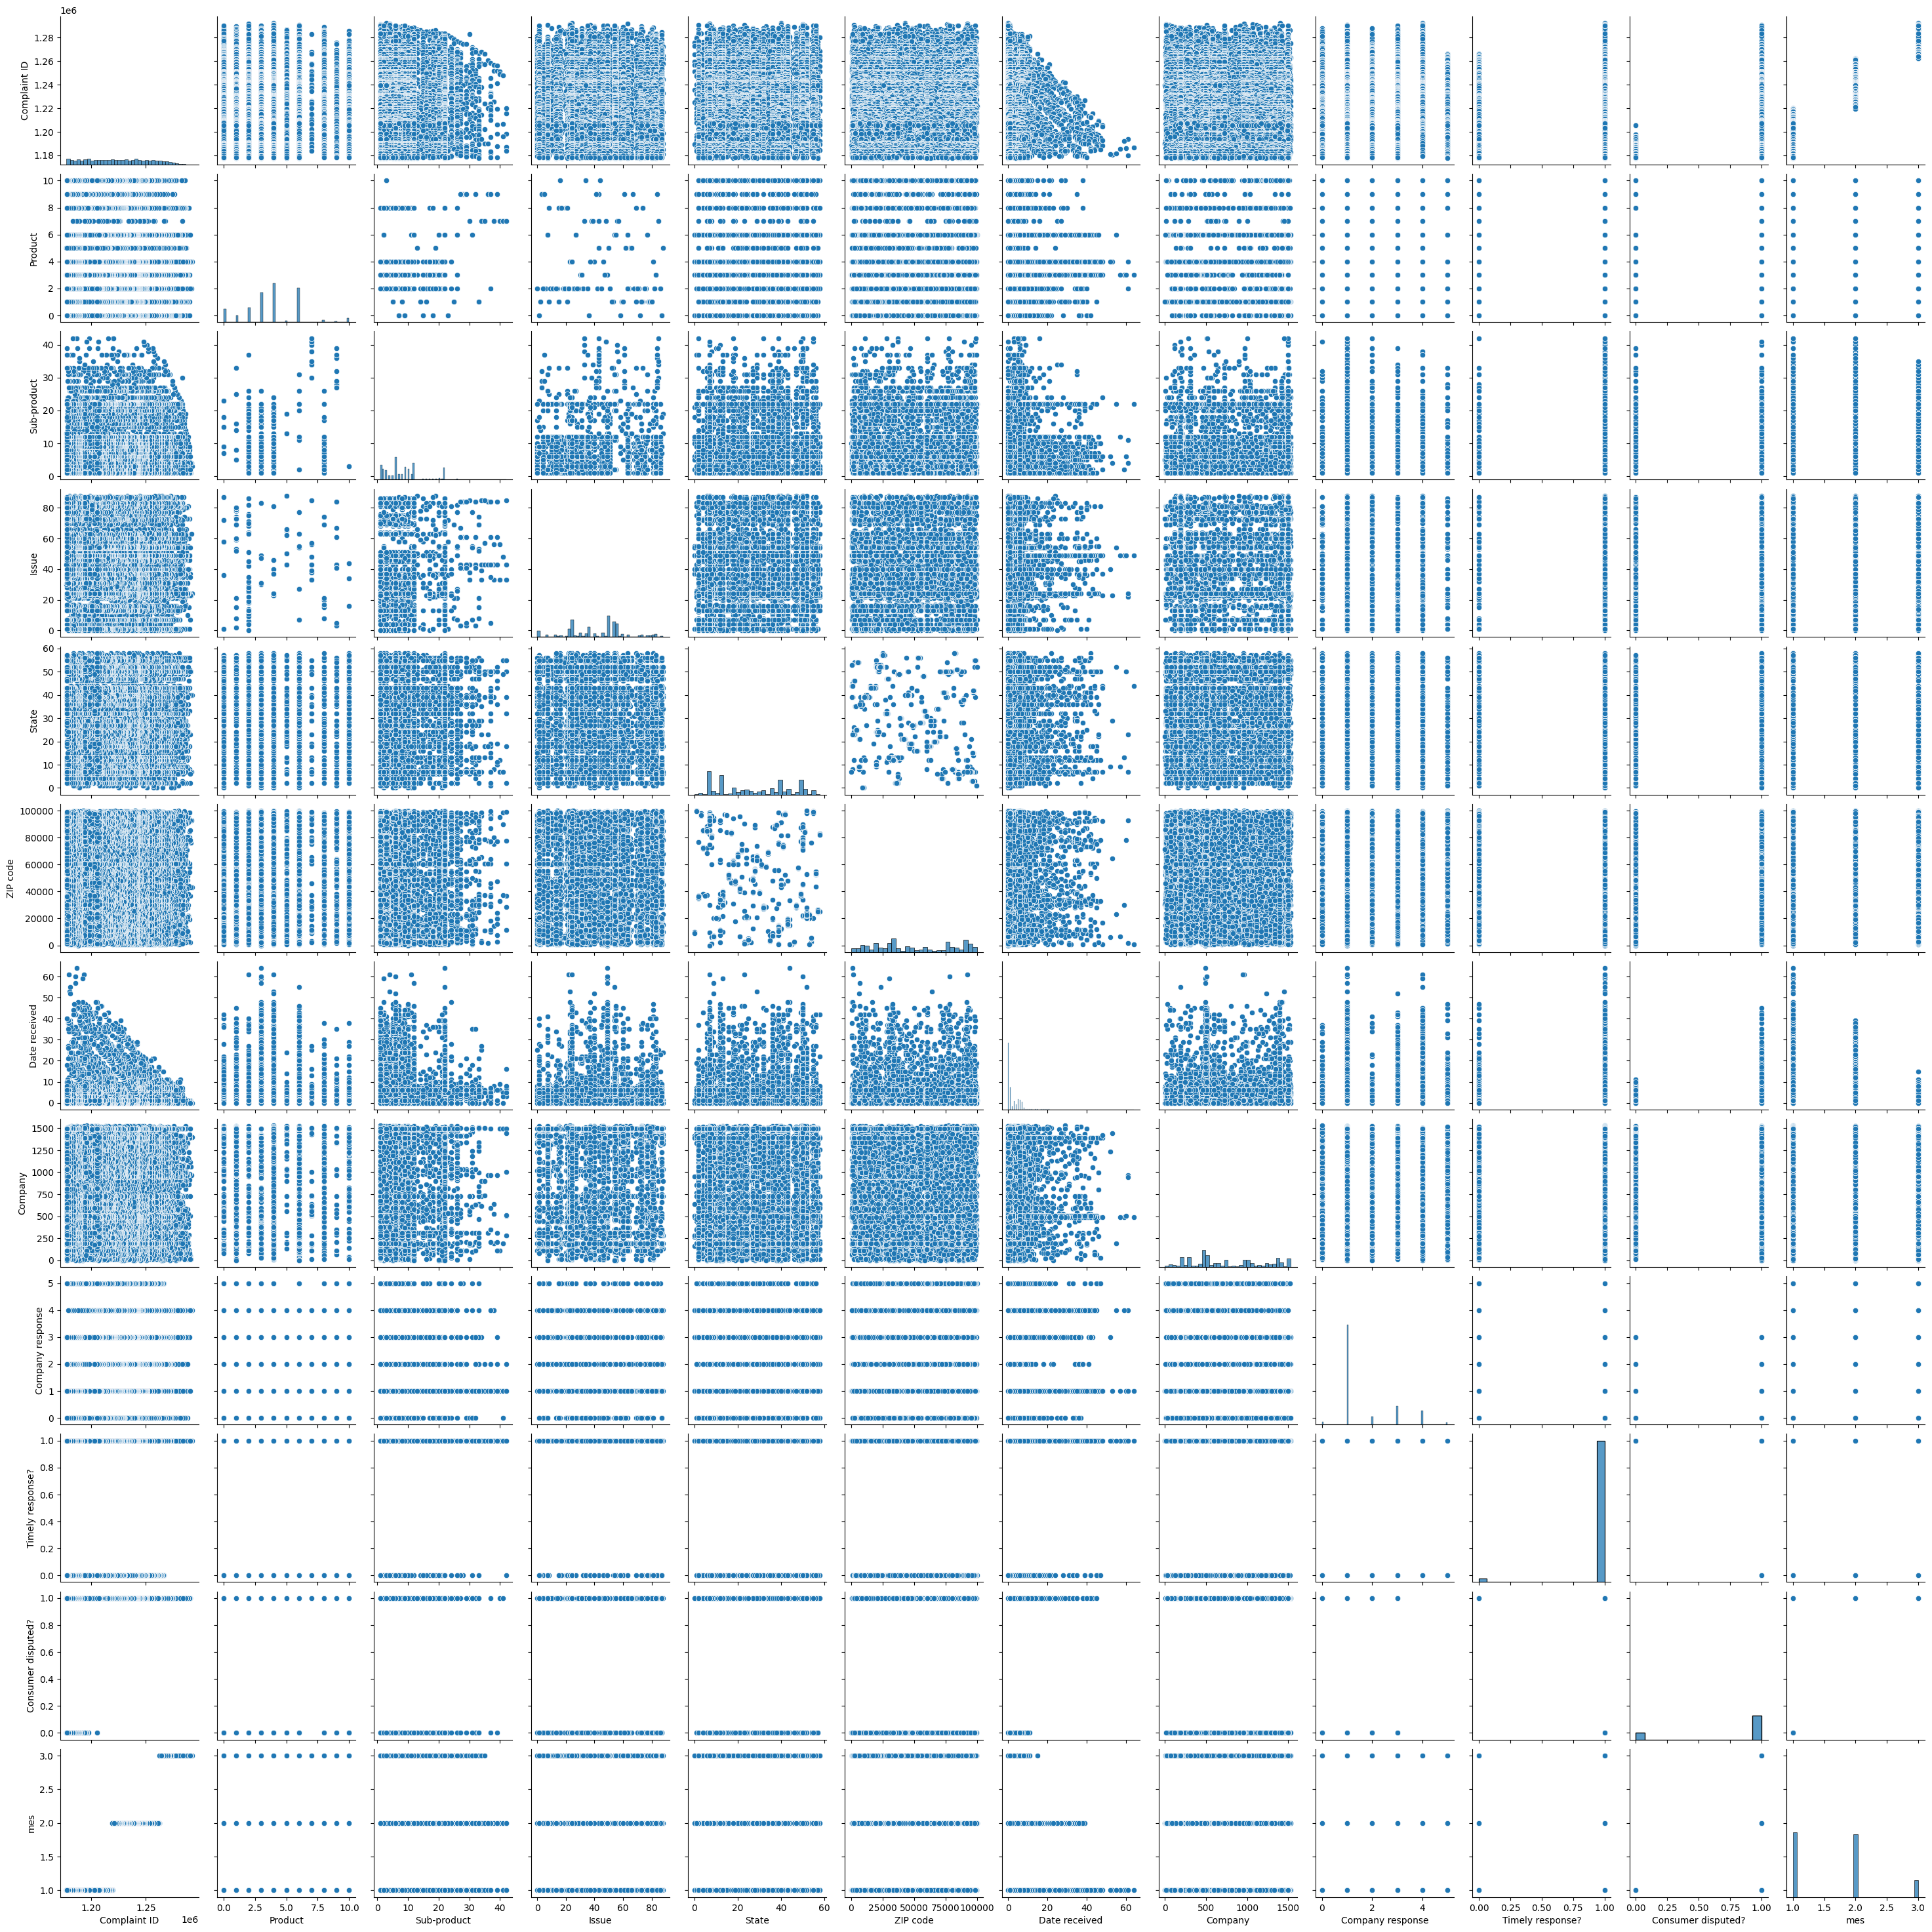

In [2]:
import seaborn as sns
import sys
sys.path.append('../src')  # Ajusta la ruta según corresponda
import preprocessing
df=preprocessing.transform()[0]
sns.pairplot(df)

<Axes: >

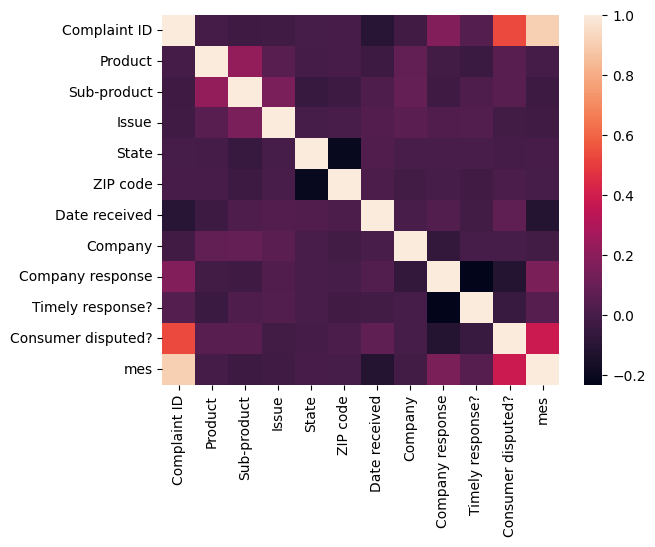

In [4]:
sns.heatmap(df.corr())